In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/opt/anaconda/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#this gives us relevant metadata for each pod that we searched 
cols = ["queryName", "title", "url", "originalUrl", "description", "author", "language", \
          "categories", "explicit", "episodeCount"]

rssDf = pd.read_csv("/shared/3/projects/benlitterer/podcastData/podRss/RSSFeeds.csv", names=cols)

In [3]:
#load in episode-level information 
cols = ["url", "epTitle", "epDescription", "duration", "pubDate", "copyright", "type",\
       "complete", "guid", "explicit", "mp3Url", "image", "transDict"]
mp3sDf = pd.read_csv("/shared/4/projects/podcasts/mp3Links/20mLinks.csv", names=cols)

<ipython-input-3-7ca77e84994a>:4: DtypeWarning: Columns (5,6,11) have mixed types. Specify dtype option on import or set low_memory=False.
  mp3sDf = pd.read_csv("/shared/4/projects/podcasts/mp3Links/20mLinks.csv", names=cols)


In [4]:
#"url" corresponds to the url of the rss feed, and is the common key between the two dataframes 
#we only want to keep the podcasts for which we have the episode information!
df = pd.merge(rssDf, mp3sDf, on="url", how="right")

In [5]:
#we don't want any same rss url, sampe mp3 url rows 
df = df.drop_duplicates(["url", "mp3Url"])

In [6]:
print(f"shape after removing dups: {df.shape}")

shape after removing dups: (21279719, 22)


Text(0.5, 0, 'duration (hours)')

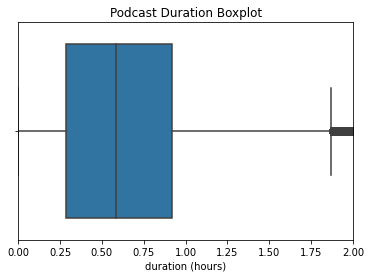

In [7]:
#plot episode lengths just for fun 
def formatLen(inStr):
    try: 
        return float(inStr) / (60*60)
    except: 
        return np.nan

df["durationF"] = df["duration"].apply(formatLen)

epLens = df.dropna(subset=["durationF"]).sample(500000)["durationF"]

sns.boxplot(x=epLens)
plt.xlim(0, 2)
plt.title("Podcast Duration Boxplot")
plt.xlabel("duration (hours)")

In [8]:
df = df.drop(columns=["durationF"])

In [14]:
#add a unique key which can be used to identify rows (helpful for parallel things)
df = df.reset_index(drop=True)
df = df.reset_index(names="key")

In [17]:
OUT_PATH = "/shared/3/projects/benlitterer/podcastData/analysis/allEpisodes.csv"
df.to_csv(OUT_PATH)

In [68]:
df = df.dropna(subset=["mp3Url"])

In [69]:
df.shape

(21270903, 23)

In [77]:
def getHost(inStr): 
    try: 
        return inStr.split("/")[2]
    except: 
        return ""
    
df["mp3Host"] = df["mp3Url"].apply(getHost)

In [78]:
hostDf = pd.DataFrame(df["mp3Host"].value_counts())